In [1]:
## Chrome Dino


In [149]:
from mss import mss
import pydirectinput
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import time
from gymnasium import Env
from gymnasium.spaces import Box,Discrete
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [150]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        # Setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        # Capture game frames
        self.cap = mss()
        self.game_location = {'top': 300, 'left': 0, 'width': 600, 'height': 500}
        self.done_location = {'top': 405, 'left': 630, 'width': 660, 'height': 70}
        
        
    def step(self, action):
        action_map = {
            0:'space',
            1: 'down', 
            2: 'no_op'
        }
        if action !=2:
            pydirectinput.press(action_map[action])

        done, done_cap = self.get_done() 
        observation = self.get_observation()
        reward = 1 
        info = {}
        return observation, reward, done,False, info
        
    
    def reset(self,seed=0):
        time.sleep(1)
        pydirectinput.click(x=150, y=150)
        pydirectinput.press('space')
        return self.get_observation(),{}
        
    def render(self):
        cv2.imshow('Game', self.current_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()
         
    def close(self):
        cv2.destroyAllWindows()
    
    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100,83))
        channel = np.reshape(resized, (1,83,100))
        return channel
    
    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))
        done_strings = ['GAME', 'GAHE']
        done=False
        # if np.sum(done_cap) < 44300000:
        #     done = True
        done = False
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        return done, done_cap

In [153]:
env = WebGame()
np.max(env.step(2)[0])


172

In [102]:
env.render()

In [103]:
env.close()

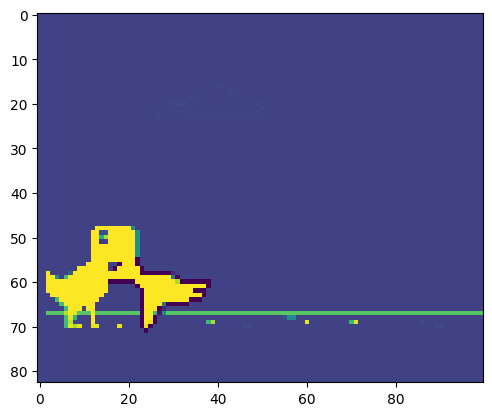

In [155]:
plt.imshow(env.get_observation()[0])

True

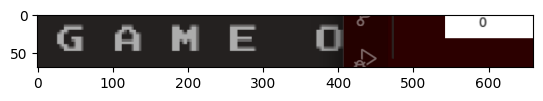

In [156]:
plt.imshow(env.get_done()[1])
env.get_done()[0]

In [157]:
env = WebGame()

In [160]:
obs = env.get_observation()[0]

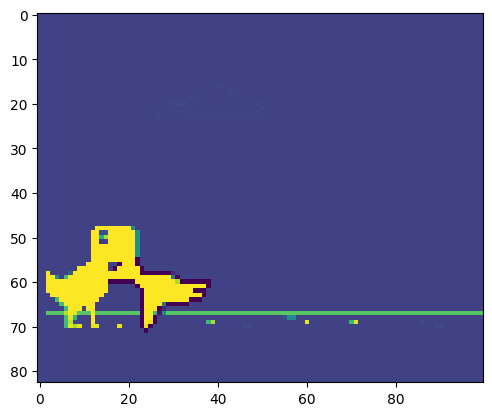

In [161]:
plt.imshow(obs)

True


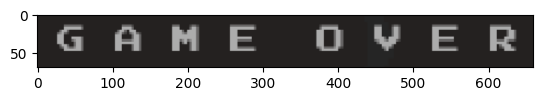

In [163]:
done , done_cap = env.get_done()
print(done)
plt.imshow(done_cap)

In [163]:
for episode in range(2):
    obs,_ = env.reset()
    done = False
    total_reward = 0

    while not done:
        obs, reward , done,_ , info = env.step(env.action_space.sample())
        total_reward+= reward
    print(f"Total reawrds for episode {episode} is {total_reward}")


Total reawrds for episode 0 is 24
Total reawrds for episode 1 is 14


In [164]:
import os 
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import env_checker

In [165]:
env = WebGame()
env_checker.check_env(env)

In [166]:

print(np.max(env.step(0)[0]),np.min(env.step(0)[0]))
print(np.max(env.reset()[0]),np.min(env.reset()[0]))

172 0
172 0


In [167]:
class TrainAndLoggingCallBack(BaseCallback):
    def __init__(self,check_freq,save_path, verbose=1):
        super(TrainAndLoggingCallBack,self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path,exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path,f'best_model_{self.n_calls}')
            self.model.save(model_path)
        return True

In [168]:
check_point = './train/'
log_dir = './logs/'

In [169]:
callback = TrainAndLoggingCallBack(check_freq=20000,save_path=check_point)

In [181]:
from stable_baselines3 import DQN


In [207]:
env = WebGame()


In [208]:
model = DQN('CnnPolicy',env,learning_rate=0.0002,tensorboard_log=log_dir,verbose=1,buffer_size=50000,learning_starts=100)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [209]:
model.learn(total_timesteps=10000)

Logging to ./logs/DQN_2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 18.5     |
|    exploration_rate | 0.93     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2        |
|    time_elapsed     | 33       |
|    total_timesteps  | 74       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.869    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2        |
|    time_elapsed     | 63       |
|    total_timesteps  | 138      |
| train/              |          |
|    learning_rate    | 0.0002   |
|    loss             | 0.179    |
|    n_updates        | 9        |
----------------------------------
----------------------------------
| rollout/            |        

KeyboardInterrupt: 

In [ ]:
model.save('Training\\DINO_10K.zip')

In [210]:
model = DQN.load("Training\\best_model_88000.zip")

c:\Users\arya2\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
c:\Users\arya2\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
c:\Users\arya2\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:95: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  warnings.warn(


MemoryError: Unable to allocate 9.28 GiB for an array with shape (1200000, 1, 1, 83, 100) and data type uint8

In [203]:
from stable_baselines3.common.evaluation import evaluate_policy

In [204]:
evaluate_policy(model,env,n_eval_episodes=3)

c:\Users\arya2\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(11.0, 0.0)